In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
mean_imputer = SimpleImputer(strategy='mean')
df['Age'] = mean_imputer.fit_transform(df[['Age']])

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True)
    #I had dropped the column "Cabin" already during an earlier run from the kaggle dataset, hence the-
    #-if condition here

In [9]:
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

In [10]:
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[num_cols] = scaler.fit_transform(df[num_cols])


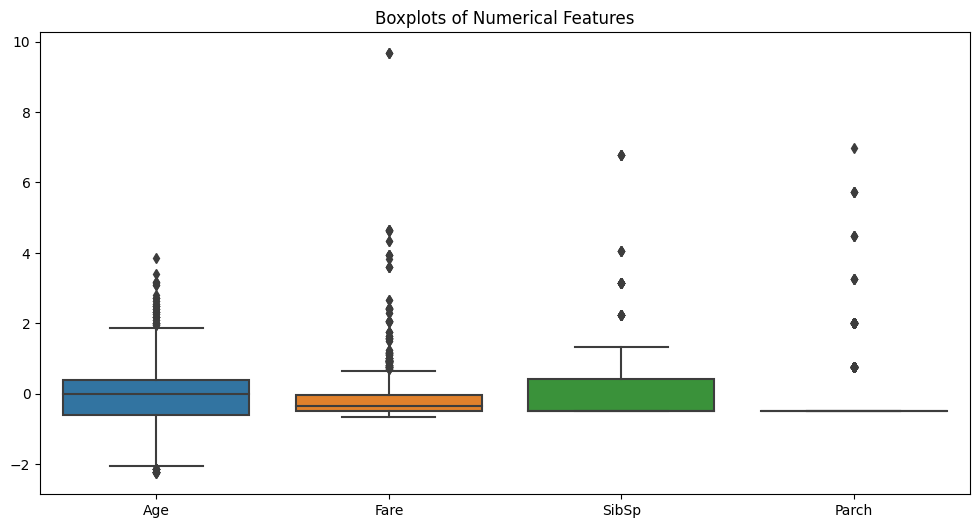

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numerical Features")
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]


In [12]:
print(df.shape)
print(df.isnull().sum())
df.head()


(775, 11)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,0.432793,-0.473674,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,-0.474545,-0.473674,373450,-0.486337,2
5,6,0,3,"Moran, Mr. James",1,0.000000,-0.474545,-0.473674,330877,-0.478116,1
